In [1]:
import pandas as pd


In [2]:
print("hello")

hello


In [3]:
out = pd.read_csv('build/tests/Release/result.csv')  

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
print_full(out)

                                      name  iterations     real_time  \
0                          CM_diag/16_mean           5  5.000920e+04   
1                        CM_diag/16_median           5  4.971070e+04   
2                        CM_diag/16_stddev           5  1.582030e+03   
3                          CM_diag/32_mean           5  1.101300e+05   
4                        CM_diag/32_median           5  1.106280e+05   
5                        CM_diag/32_stddev           5  2.629020e+03   
6                          CM_diag/48_mean           5  5.605810e+08   
7                        CM_diag/48_median           5  5.582250e+08   
8                        CM_diag/48_stddev           5  2.687210e+07   
9                          CM_diag/64_mean           5  1.951610e+09   
10                       CM_diag/64_median           5  1.959850e+09   
11                       CM_diag/64_stddev           5  3.831480e+07   
12                         CM_diag/80_mean           5  3.120500

In [4]:
out = pd.read_csv('build/tests/Release/result.csv')  
out = out.drop(["iterations", "time_unit", "bytes_per_second", "items_per_second", "label","error_occurred", "error_message", "cpu_time"], axis =1 )
spill_res = out["name"].str.rsplit("/")
print(spill_res)
#spill_res = spill_res.spill('_')
names = ["type", "size_tmp"]
data = spill_res.to_list()

new_df = pd.DataFrame(data, columns=names)
res = pd.concat([new_df, out], axis=1)
res = res.drop("name", axis = 1)
print(res)

spill_res = res["size_tmp"].str.rsplit("_")
print(spill_res)
names = ["size", "what"]
data = spill_res.to_list()

new_df = pd.DataFrame(data, columns=names)
res = pd.concat([new_df, res], axis=1)
res = res.drop("size_tmp", axis = 1)
print(res)




res["size"]  =  pd.to_numeric(res["size"])

0                            [CM_diag, 16_mean]
1                          [CM_diag, 16_median]
2                          [CM_diag, 16_stddev]
3                            [CM_diag, 32_mean]
4                          [CM_diag, 32_median]
                         ...                   
175    [CPU_diag_calculations_only, 144_median]
176    [CPU_diag_calculations_only, 144_stddev]
177      [CPU_diag_calculations_only, 160_mean]
178    [CPU_diag_calculations_only, 160_median]
179    [CPU_diag_calculations_only, 160_stddev]
Name: name, Length: 180, dtype: object
                           type    size_tmp     real_time  iterations.1
0                       CM_diag     16_mean  5.000920e+04           283
1                       CM_diag   16_median  4.971070e+04           283
2                       CM_diag   16_stddev  1.582030e+03             0
3                       CM_diag     32_mean  1.101300e+05          1078
4                       CM_diag   32_median  1.106280e+05          1078
.

In [5]:
res.dtypes

size              int64
what             object
type             object
real_time       float64
iterations.1      int64
dtype: object

In [6]:
res

,size,what,type,real_time,iterations.1
0,16,mean,CM_diag,5.000920e+04,283
1,16,median,CM_diag,4.971070e+04,283
2,16,stddev,CM_diag,1.582030e+03,0
3,32,mean,CM_diag,1.101300e+05,1078
4,32,median,CM_diag,1.106280e+05,1078
...,...,...,...,...,...
175,144,median,CPU_diag_calculations_only,1.380410e+10,18605
176,144,stddev,CPU_diag_calculations_only,7.896230e+08,0
177,160,mean,CPU_diag_calculations_only,2.379990e+10,22410
178,160,median,CPU_diag_calculations_only,2.380070e+10,22410


In [7]:
OCL_diag=res["type"] == "OCL_diag"
CM_diag  = res["type"] == "CM_diag"
CPU_diag  = res["type"] == "CPU_diag"
CPU_diag_calculations_only = res["type"]== "CPU_diag_calculations_only"
CM_diag_calculations_only = res["type"]== "CM_diag_calculations_only"
OCL_diag_calculations_only = res["type"]== "OCL_diag_calculations_only"

mean = res["what"] == "mean"



In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


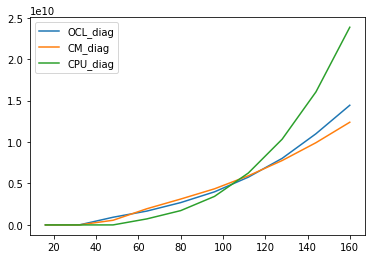

In [9]:
plt.plot(res[OCL_diag][mean]["size"], res[OCL_diag][mean]["real_time"],label='OCL_diag')
plt.plot(res[CM_diag][mean]["size"], res[CM_diag][mean]["real_time"],label='CM_diag')
plt.plot(res[CPU_diag][mean]["size"], res[CPU_diag][mean]["real_time"],label='CPU_diag')
plt.legend()
plt.show()

C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\itetyush\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


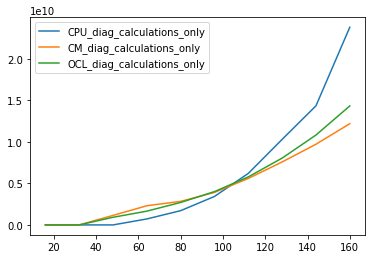

In [10]:
plt.plot(res[CPU_diag_calculations_only][mean]["size"], res[CPU_diag_calculations_only][mean]["real_time"],label='CPU_diag_calculations_only')
plt.plot(res[CM_diag_calculations_only][mean]["size"], res[CM_diag_calculations_only][mean]["real_time"],label='CM_diag_calculations_only')
plt.plot(res[OCL_diag_calculations_only][mean]["size"], res[OCL_diag_calculations_only][mean]["real_time"],label='OCL_diag_calculations_only')
plt.legend()
plt.show()